In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


2025-07-23 09:49:30.072018: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-23 09:49:30.163687: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-23 09:49:30.226989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753253370.286405    6247 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753253370.306150    6247 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753253370.434876    6247 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
#Extracting the datset from a zip filr 
import zipfile
import os

# a path to the zip file
zip_path = 'fraud_data.zip' 
extract_dir = 'fraud_data_extracted'  # folder to extract into

# Create the extraction folder if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✅ Files extracted to '{extract_dir}'")


✅ Files extracted to 'fraud_data_extracted'


In [5]:
fraud_data = pd.read_csv("./fraud_data_extracted/creditcard.csv")
fraud_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 1.  Exploratory Data Analysis: Understanding Our data

In [6]:
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All  data types are float point 
All features are PCA transformed except 'Time' and 'Amount' features (for confidentiality purposes)
Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount

In [8]:
#   Checking for mising data
fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

####  1.1 Class Distribution Analysis

/tmp/ipykernel_6247/4047511502.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=fraud_data, palette=palette)


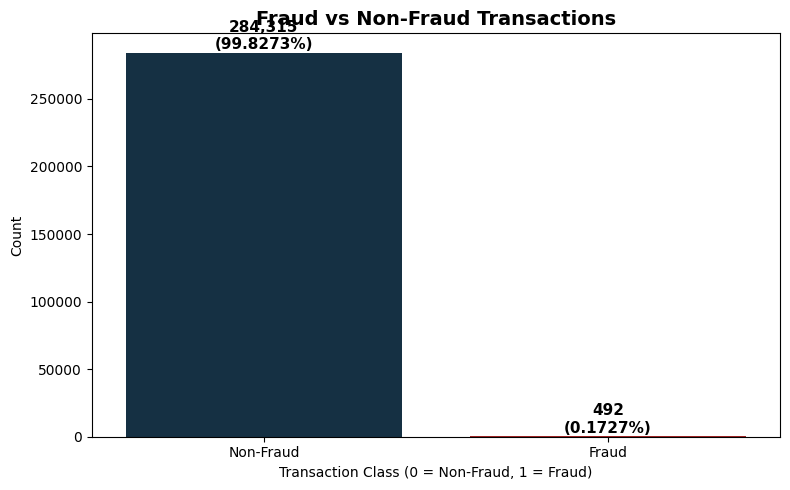

In [9]:


# Count and percentage of each class
count_class = fraud_data['Class'].value_counts().sort_index()
percent_class = 100 * count_class / len(fraud_data)

# Setup the plot
plt.figure(figsize=(8, 5))
palette = ["#0D314B", "#B80F0F"]

ax = sns.countplot(x='Class', data=fraud_data, palette=palette)

# Add annotations for count and percent
for i, (count, percent) in enumerate(zip(count_class, percent_class)):
    ax.text(i, count + 200, f'{count:,}\n({percent:.4f}%)', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Title and axis labels
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.show()


The dataset is severly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#### 1.2 Transaction Amount Patterns : 
Seeing if frauds have a distinct pattern in the 'Amount'.



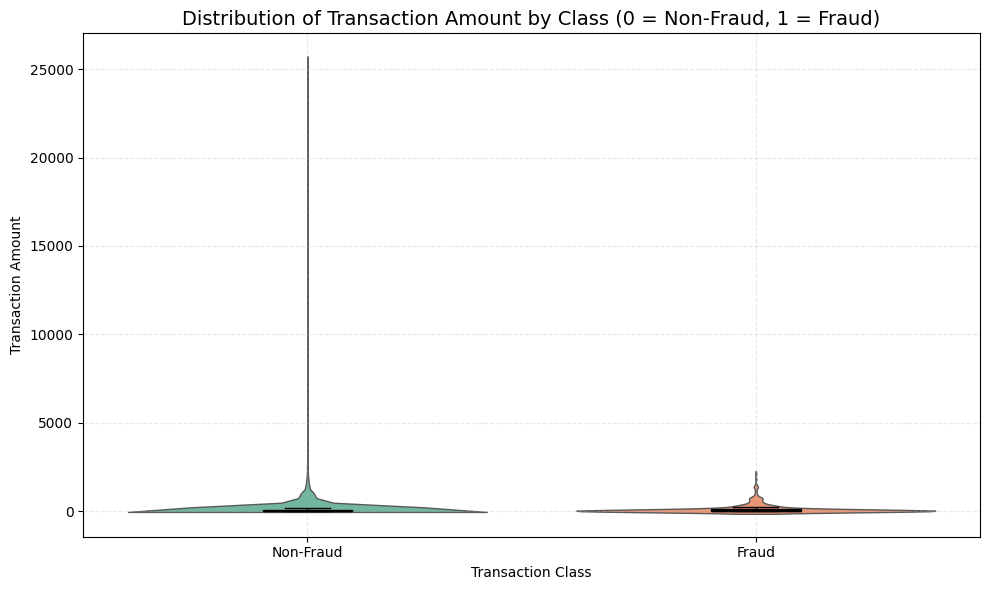

In [10]:

plt.figure(figsize=(10, 6))

# Violin plot
sns.violinplot(x='Class', y='Amount', hue='Class',  data=fraud_data, inner=None,  palette="Set2", linewidth=1,legend=False  # <-- suppress extra legend
)

# Box plot on top of the violin
sns.boxplot(x='Class', y='Amount', data=fraud_data, width=0.2, color='k', showfliers=False
)

# Titles and labels
plt.title('Distribution of Transaction Amount by Class (0 = Non-Fraud, 1 = Fraud)', fontsize=14)
plt.xlabel('Transaction Class')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()



**Left -> Violin: Class 0 (Non-Fraud)**: 
Most non-fraud transactions have small amounts.

But there’s a long tail—some go up to ~25,000+ (outliers).

The density bulge near the bottom suggests most non-fraud transactions are under $100.

**Right -> Violin: Class 1 (Fraud)**: 
Fraudulent transactions are much smaller on average.

Most frauds are concentrated under $200.

Almost no fraud transactions reach very high amounts like the non-fraud ones.

The shape is tighter, suggesting less variation in fraudulent amounts.

**NOTE: There’s a pattern: Fraudulent transactions are smaller and less varied in amount.**

#### 1.3. Time Pattern of Fraud :To Check if fraud happens at specific times of day.

Text(0.5, 1.0, 'Hourly Transaction Distribution (Fraud vs Non-Fraud)')

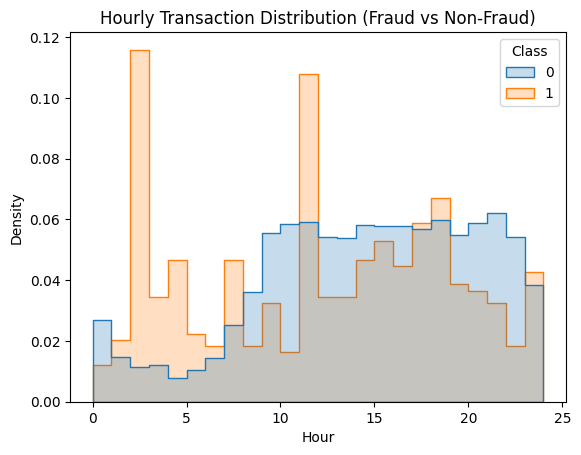

In [11]:

fraud_data['Hour'] = (fraud_data['Time'] / 3600) % 24  # convert seconds to hours

sns.histplot(data=fraud_data, x='Hour', hue='Class', bins=24, element='step', stat='density', common_norm=False)
plt.title("Hourly Transaction Distribution (Fraud vs Non-Fraud)")


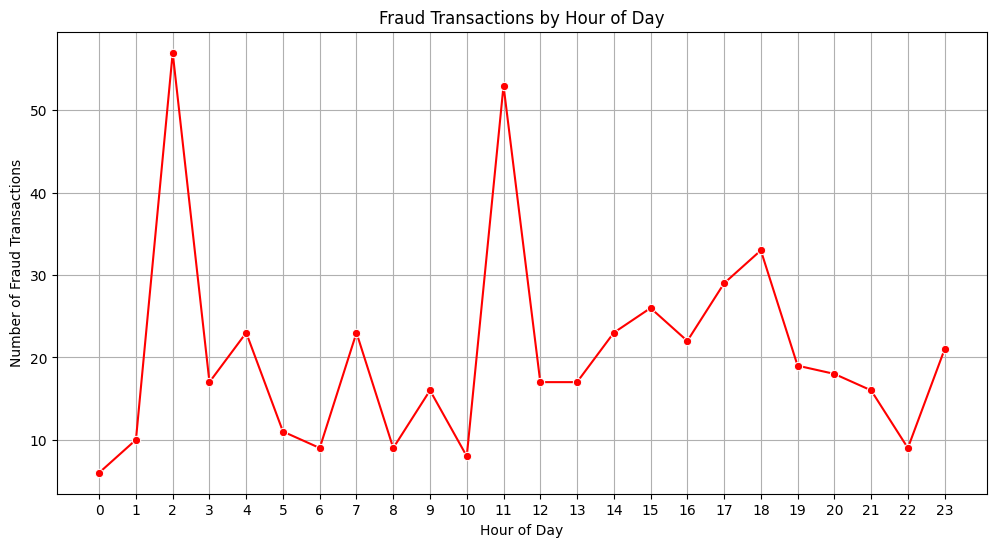

In [12]:
# TimeSeries Analysis of Froud Hour
#checking if hour is an interger 
fraud_data['Hour'] = fraud_data['Hour'].astype(int)

fraud_by_hour = fraud_data[fraud_data['Class'] == 1]['Hour'].value_counts().sort_index()


#ploting the time series analysis

plt.figure(figsize=(12, 6))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o', color='red')
plt.title("Fraud Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Fraud Transactions")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



Fraudulent transactions (orange) peak heavily during certain early morning hours, especially around 1–2 AM and 10–11 AM.

    These spikes are much higher than the general transaction volume at those times.

       Suggests fraudsters might prefer quieter hours when normal activity is low, making fraud harder to detect.

Non-fraudulent transactions (blue) are more evenly distributed throughout the day.

    There’s a slight increase during working hours (9 AM – 6 PM), which is expected for typical user behavior.

There is less overlap between fraud and non-fraud patterns in the early morning (0–6 AM) and around midday.



#### 1.4. Correlation Heatmap: Explore how components relate and check for fraud-related features.

Text(0.5, 1.0, 'Correlation Matrix')

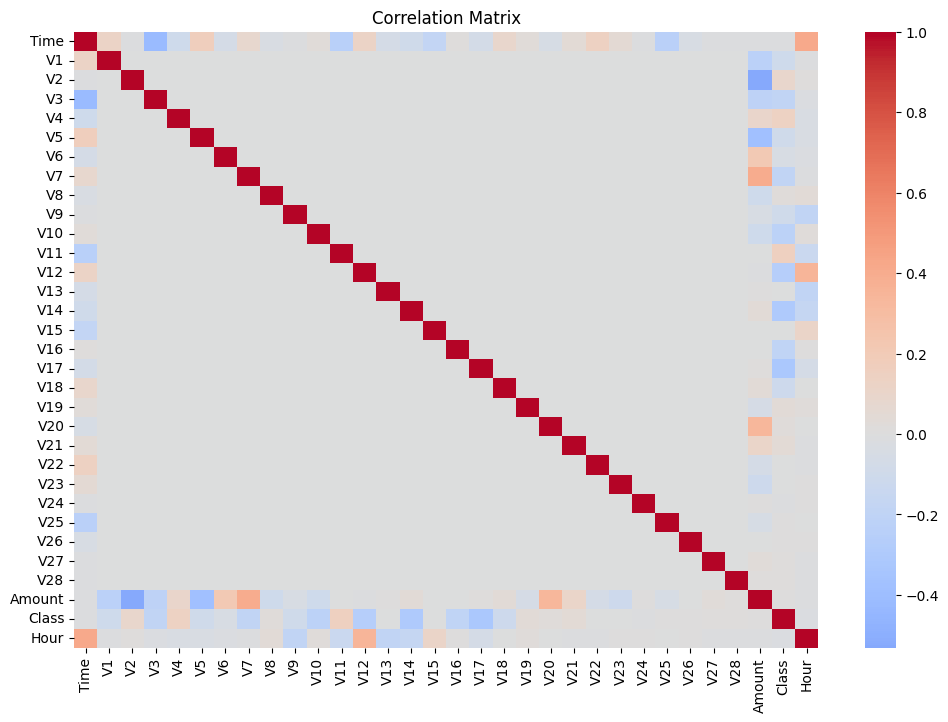

In [13]:
corr = fraud_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")


In [14]:
# zooming correlation with target
fraud_corr = corr['Class'].drop('Class').sort_values(ascending=False)
print(fraud_corr.head(10))  # Features most correlated with fraud


V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64


Features like V11, V4, and V2 are highly predictive of fraud in the dataset. and should be retained in any model.

Amount has a small but non-zero importance—suggesting frauds may involve specific transaction sizes.

#### 1.5. Feature Distributions (V1 to V28) : To see if any PCA features separate fraud clearly.


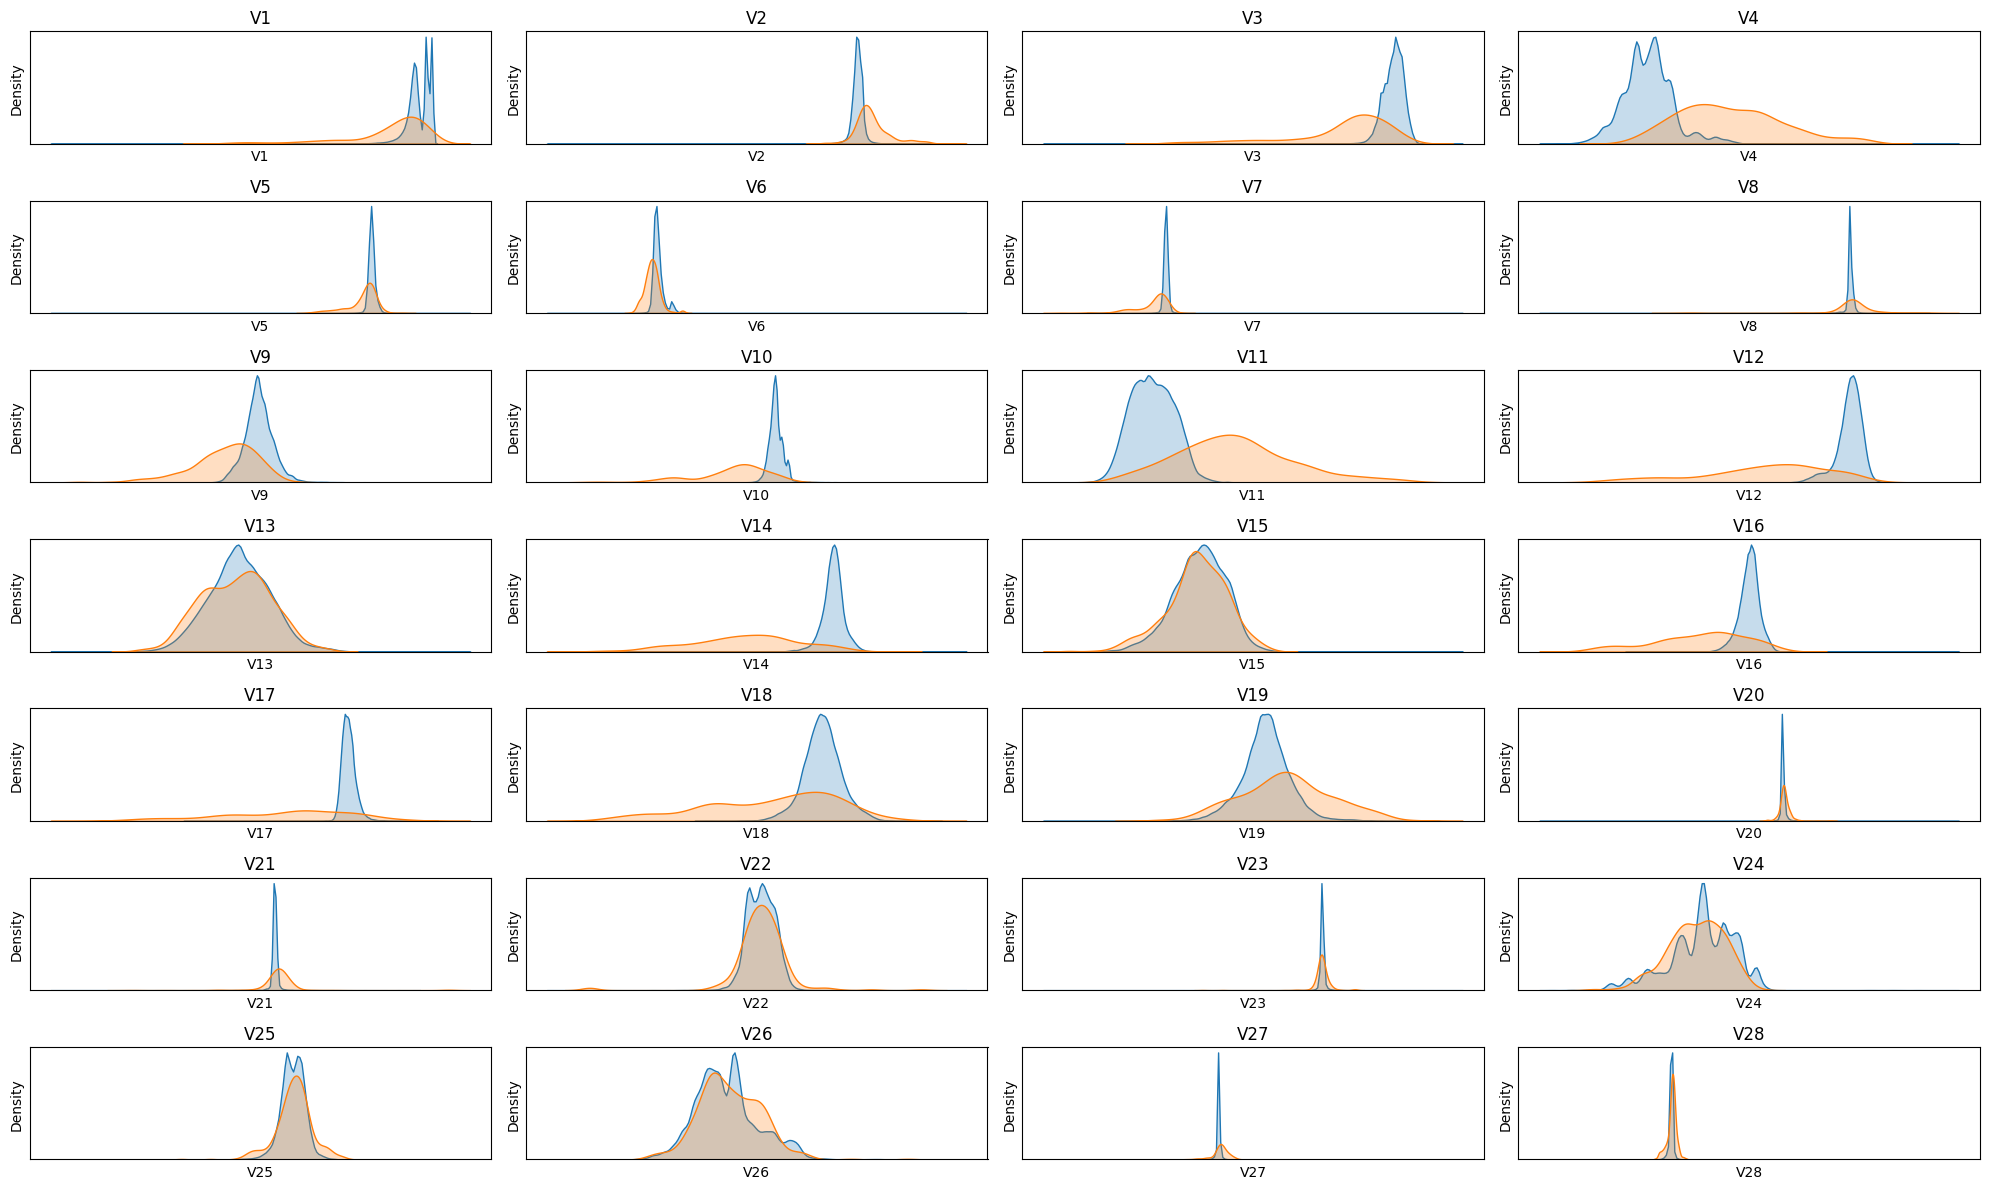

In [15]:


frauds = fraud_data[fraud_data['Class'] == 1]
non_frauds = fraud_data[fraud_data['Class'] == 0]

plt.figure(figsize=(20, 12))
for i, col in enumerate([f'V{i}' for i in range(1, 29)]):
    plt.subplot(7, 4, i + 1)
    sns.kdeplot(non_frauds[col], label='Non-Fraud', fill=True)
    sns.kdeplot(frauds[col], label='Fraud', fill=True)
    plt.title(col)
    plt.xticks([], [])
    plt.yticks([], [])
plt.tight_layout()


These show clearly separated distributions between fraud and non-fraud — excellent for fraud detection.

    V2: Fraud has a sharp peak far from where non-fraud peaks.

    V4: Visibly separated distributions — great predictive power.

    V11: Fraud is skewed left, while non-fraud is more centered.

    V14, V10, V17: Also show different patterns for fraud and non-fraud.

Moderately Informative Features:
    V8, V19, V20, V12: Some separation, but still quite overlapping.

Less Useful / Overlapping Features:
V13, V22, V25: Nearly identical distributions for both classes, meaning they carry less discriminative power on their own.

### 2. Feature Engineering

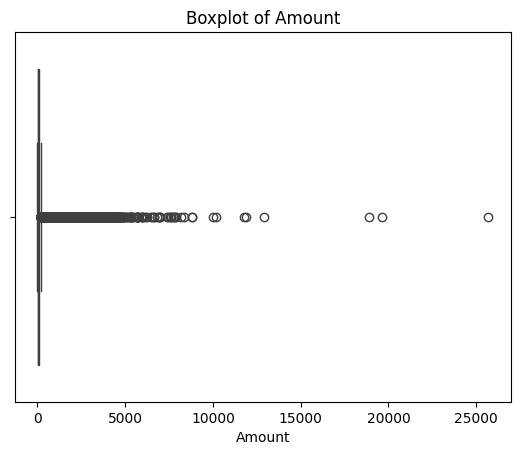

In [16]:
#Checking the distribution of Amount Feature

sns.boxplot(x=fraud_data['Amount'])
plt.title("Boxplot of Amount")
plt.show()

In [17]:
#Amount has outliers

# Applying RobustScaler to scale "Amount"

scaler = RobustScaler()
fraud_data['Amount'] = scaler.fit_transform(fraud_data[['Amount']]) #overide the old amount column


In [18]:
fraud_data['Amount'].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

In [19]:
# Standardizing 'Time' Feature

time = fraud_data['Time']
fraud_data['Time'] = (time - time.min()) / (time.max() - time.min()) #applying custom mim_max scaler
fraud_data        

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0,23
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0,23
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0,23
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0,23


In [20]:
fraud_data['Time']

0         0.000000
1         0.000000
2         0.000006
3         0.000006
4         0.000012
            ...   
284802    0.999965
284803    0.999971
284804    0.999977
284805    0.999977
284806    1.000000
Name: Time, Length: 284807, dtype: float64

In [21]:
# Drop the hour column
fraud_data.drop(columns=['Hour'], inplace=True)

In [22]:

fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


### 3. Data Splitting

In [23]:
# Shuffling the data

new_df = fraud_data.sample(frac=1, random_state=1)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0


In [24]:
#splitting the data into train, val and test


# Separate features and target
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# First split → Train+Val and Test (80% / 20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

#  Second split → Train and Validation (from the 80% above → 75% train, 25% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=1
)


In [25]:
# lets see data in the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (170883, 30)
y_train shape: (170883,)
X_val shape: (56962, 30)
y_val shape: (56962,)
X_test shape: (56962, 30)
y_test shape: (56962,)


### 4. Data Modeling

4.1 Logistic Regression: Base Model

In [26]:
# Initializing a logistic regression

log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [17]:
# predict the validation set 
y_pred = log_reg.predict(X_val)

In [18]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.9992099996488887

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.66      0.74        99

    accuracy                           1.00     56962
   macro avg       0.93      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56852    11]
 [   34    65]]


**Report**

The model overal acuracy is impressive. However, despite the high overall accuracy of 99.92%, this metric alone is misleading due to the extreme class imbalance typical in fraud detection problems. The model performs perfectly on the majority class (non-fraud) with near-perfect precision and recall, but performance drops significantly on the minority class (fraud). For fraud cases (class 1), the recall is only 0.66, meaning the model correctly identified just 66% of fraudulent transactions, missing 34 out of 99 cases, which is critical in real-world applications where false negatives (missed frauds) are costly. The precision of 0.86 indicates that among the flagged fraudulent cases, 14% were actually not fraud. The F1-score of 0.74 for fraud shows moderate performance. These results suggest that while logistic regression performs well overall, it struggles to reliably detect fraud in an imbalanced setting.


#### 4.2. Logistic Regression Handling Class Imbalance 

In [19]:
# manually sampple fraud and non fraud

In [27]:

# Combine X and y into a single dataframe for easy manipulation
data = pd.concat([X, y], axis=1)

# Separate fraud and non-fraud
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Undersample the non-fraud class
non_fraud_sample = non_fraud.sample(n=len(fraud), random_state=42)

# Combine back the balanced data
balanced_data = pd.concat([fraud, non_fraud_sample])

# Shuffle the dataset
balanced_data = shuffle(balanced_data, random_state=42)

# Separate X and y again
X_balanced = balanced_data.drop('Class', axis=1)
y_balanced = balanced_data['Class']


In [28]:


# 1. First split: train (80%) and temp (20%)
X_train_b, X_temp_b, y_train_b, y_temp_b = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# 2. Second split: validation (10%) and test (10%) from temp
X_val_b, X_test_b, y_val_b, y_test_b = train_test_split(
    X_temp_b, y_temp_b, test_size=0.5, stratify=y_temp_b, random_state=42
)


In [29]:
# lets print to check shapes
print("Train shape:", X_train_b.shape, y_train_b.shape)
print("Validation shape:", X_val_b.shape, y_val_b.shape)
print("Test shape:", X_test_b.shape, y_test_b.shape)


Train shape: (787, 30) (787,)
Validation shape: (98, 30) (98,)
Test shape: (99, 30) (99,)


In [30]:
#fit and predict new model on balanced dataset
log_reg_b = LogisticRegression(max_iter=1000, random_state=42)

#fit
log_reg_b.fit(X_train_b, y_train_b)
y_val_pred_b = log_reg_b.predict(X_val_b)

In [31]:
print("=== Validation Set Evaluation ===")
print(confusion_matrix(y_val_b, y_val_pred_b))
print(classification_report(y_val_b, y_val_pred_b))
print("Accuracy:", accuracy_score(y_val_b, y_val_pred_b))

=== Validation Set Evaluation ===
[[48  1]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.98      0.94      0.96        49

    accuracy                           0.96        98
   macro avg       0.96      0.96      0.96        98
weighted avg       0.96      0.96      0.96        98

Accuracy: 0.9591836734693877


**Report**

After manually balancing the dataset, the logistic regression model achieved a significantly improved performance in detecting fraudulent transactions. The overall accuracy is 95.92%, but more importantly, the performance on both classes is now much more balanced. The recall for fraud cases (class 1) is 0.94, meaning the model correctly identified 94% of the fraudulent transactions, a substantial improvement from the 66% recall observed in the imbalanced setup. Similarly, the precision for fraud is 0.98, indicating very few false positives. The F1-score of 0.96 for both classes reflects a strong balance between precision and recall. These results demonstrate that manual balancing greatly enhanced the model’s ability to detect fraud, making it a more reliable option for real-world deployment where identifying fraudulent activity is crucial.



#### 4.3. Model 2 : Decision Tree Classifier

Training the decision tree on unbalanced dataset

In [32]:
#Initializing a decision tree model
tree_clf_1 = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=5,
    random_state=42
)


# 2. Train on the balanced training set
tree_clf_1.fit(X_train, y_train)
# 3. Predict on validation set
y_val_pred = tree_clf_1.predict(X_val)
# 4. Evaluate
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.80      0.84        99

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Validation Confusion Matrix:
 [[56852    11]
 [   20    79]]


Lets now train a Decision Tree on the balanced dataset

In [26]:
#Initializing a decision tree model
tree_clf = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=5,
    random_state=42
)

In [27]:

# 2. Train on the balanced training set
tree_clf.fit(X_train_b, y_train_b)
# 3. Predict on validation set
y_val_pred = tree_clf.predict(X_val_b)
# 4. Evaluate
print("Validation Classification Report:\n", classification_report(y_val_b, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val_b, y_val_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        49
           1       1.00      0.90      0.95        49

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98

Validation Confusion Matrix:
 [[49  0]
 [ 5 44]]


**Report**


The decision tree classifier trained on imbalanced data achieved an overall accuracy of 99.98%, which is very high. However, similar to the earlier logistic regression model, this high accuracy is largely driven by the model’s excellent performance on the majority class (non-fraud). Notably, the recall for fraud cases (class 1) improved to 0.80, indicating that 80% of fraudulent transactions were correctly identified — better than the logistic regression's 66% in the imbalanced setup. The precision for fraud also rose to 0.88, meaning fewer false positives. The F1-score for fraud is 0.84, suggesting improved balance between precision and recall. While still affected by class imbalance, the decision tree shows better sensitivity to fraud compared to logistic regression without any balancing technique, making it a stronger choice under imbalanced conditions.

The decision tree model trained on a manually balanced dataset achieved an overall accuracy of 95% on the validation set. The model demonstrated strong performance on both classes: it perfectly identified all non-fraudulent cases (class 0) with a recall of 1.00, and detected 90% of fraudulent transactions (class 1), indicating solid sensitivity. The precision for fraud was 1.00, meaning there were no false positives for fraud, while the F1-score for both classes was 0.95, reflecting a well-balanced trade-off between precision and recall. Compared to the imbalanced setup, this manually balanced approach improved the model’s ability to detect fraud without sacrificing too much accuracy, making it highly effective for fraud detection.



#### 4.4 :Random Forest Classifier


**Lets see performanced on Unbalaced Dataset**

In [28]:

# Initialize the model
rf_model_1= RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_1.fit(X_train, y_train)

# Predict on validation data
y_val_pred = rf_model_1.predict(X_val)

# Evaluate
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nValidation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.77      0.84        99

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Validation Confusion Matrix:
[[56858     5]
 [   23    76]]


**Lets now se its performance on balanced dataset

In [30]:


# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_b, y_train_b)

# Predict on validation data
y_val_pred = rf_model.predict(X_val_b)

# Evaluate
print("Validation Classification Report:")
print(classification_report(y_val_b, y_val_pred))

print("\nValidation Confusion Matrix:")
print(confusion_matrix(y_val_b, y_val_pred))


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        49
           1       1.00      0.92      0.96        49

    accuracy                           0.96        98
   macro avg       0.96      0.96      0.96        98
weighted avg       0.96      0.96      0.96        98


Validation Confusion Matrix:
[[49  0]
 [ 4 45]]


**Report**


Imbalanced:
While overall accuracy is very high, the model missed 23 fraud cases — this is risky in high-stakes fraud detection.

Balanced
Precision for Fraud (class 1) = 1.00
→ Of all transactions predicted as fraud, 100% were actually fraud.

Recall for Fraud = 0.92
→ It caught 92% of actual fraud cases, which is quite strong.

No misclassifications for Legit → 100% recall for class 0.

The balanced Random Forest gives up a tiny bit of overall accuracy to massively improve fraud detection, which is exactly the trade-off we want in imbalanced classification problems like credit card fraud.


#### 4.5 XGBOOST

In [33]:

#Lets perform an xgboost and see how it performs on unbalanced data

# Instantiate XGBoost (with default settings)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train on unbalanced data
xgb.fit(X_train, y_train)

# Validate on validation set
y_val_pred = xgb.predict(X_val)
print("Validation Classification Report (Unbalanced XGBoost):")
print(classification_report(y_val, y_val_pred))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


/home/linet/Documents/DS_PROJECTS/Credit_Card_Fraud_Detection/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:16:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Classification Report (Unbalanced XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.79      0.86        99

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Validation Confusion Matrix:
[[56859     4]
 [   21    78]]


In [34]:
#performing xgboost on balanced data
xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train on balanced data
xgb2.fit(X_train_b, y_train_b)

# Validate on validation set
y_val_pred = xgb2.predict(X_val_b)
print("Validation Classification Report (Balanced XGBoost):")
print(classification_report(y_val_b, y_val_pred))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val_b, y_val_pred))

Validation Classification Report (Balanced XGBoost):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       1.00      0.94      0.97        49

    accuracy                           0.97        98
   macro avg       0.97      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98

Validation Confusion Matrix:
[[49  0]
 [ 3 46]]


/home/linet/Documents/DS_PROJECTS/Credit_Card_Fraud_Detection/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:16:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Report**

Even with the same balanced dataset, XGBoost still performs best. It:

Has fewer false negatives (i.e., misses fewer frauds).

Produces higher overall F1-score.

Retains perfect precision, meaning no false alarms.

This shows XGBoost’s superior ability to capture subtle patterns, especially useful for tasks like fraud detection where recall for the minority class is crucial.

#### 4.6: Deep Neural Networks

Finally we will train a deep neural network and see how it performs on both balanced and unbalance datasets

In [35]:
def build_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [36]:
#imbalanced 
model_imb = build_model(X_train.shape[1])
model_imb.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))



/home/linet/Documents/DS_PROJECTS/Credit_Card_Fraud_Detection/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-23 10:21:35.504210: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9847 - loss: 0.0426 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 2/10
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 3/10
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 4/10
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 5/10
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 6/10
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 7/10
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0034
Epoch 8/10
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9995 - loss: 0

In [36]:
#balanced
model_bal = build_model(X_train_b.shape[1])
model_bal.fit(X_train_b, y_train_b, epochs=10, batch_size=32, validation_data=(X_val_b, y_val_b))



Epoch 1/10


/home/linet/Documents/DS_PROJECTS/Credit_Card_Fraud_Detection/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6534 - loss: 0.5503 - val_accuracy: 0.8367 - val_loss: 0.3734
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8324 - loss: 0.3861 - val_accuracy: 0.9388 - val_loss: 0.2881
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9053 - loss: 0.3257 - val_accuracy: 0.9490 - val_loss: 0.2316
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9481 - loss: 0.2288 - val_accuracy: 0.9490 - val_loss: 0.1915
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9414 - loss: 0.2297 - val_accuracy: 0.9490 - val_loss: 0.1677
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9443 - loss: 0.1859 - val_accuracy: 0.9490 - val_loss: 0.1522
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9353 - loss: 0.1959 - val_accuracy: 0.9490 - val_loss: 0.1416
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9447 - loss: 0.2043 - val_accuracy: 0.9388 - val_loss: 0.1337
Epo

In [37]:
#evaluate model performance

y_pred_imb = (model_imb.predict(X_val) > 0.5).astype("int32")
y_pred_bal = (model_bal.predict(X_val_b) > 0.5).astype("int32")

print("Imbalanced Classification Report:")
print(classification_report(y_val, y_pred_imb))

print("Balanced Classification Report:")
print(classification_report(y_val_b, y_pred_bal))



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Imbalanced Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.81      0.82        99

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Balanced Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.98      0.92      0.95        49

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98



**Report**

**Lets Evaluate model performance on all the test data**

In [38]:
# define a function to evaluate model performance 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model, X_test, y_test, model_name="Model"):
    print(f"\n🔍 {model_name} Evaluation Report:\n")

    # Predictions
    y_pred = model.predict(X_test)
    
    # For classifiers with predict_proba (for AUC)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For neural networks using sigmoid output
        y_prob = model.predict(X_test).ravel()
        y_pred = (y_prob > 0.5).astype(int)

    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # AUC Score
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc:.4f}")


In [39]:
#Evaluating models fit on balanced data on Test data

evaluate_model(log_reg_b, X_test_b, y_test_b, "Logistic Regression")





🔍 Logistic Regression Evaluation Report:

Confusion Matrix:
[[49  1]
 [ 7 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        50
           1       0.98      0.86      0.91        49

    accuracy                           0.92        99
   macro avg       0.93      0.92      0.92        99
weighted avg       0.93      0.92      0.92        99

AUC Score: 0.9747


In [40]:
evaluate_model(rf_model, X_test_b, y_test_b, "Random Forest")


🔍 Random Forest Evaluation Report:

Confusion Matrix:
[[49  1]
 [ 7 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        50
           1       0.98      0.86      0.91        49

    accuracy                           0.92        99
   macro avg       0.93      0.92      0.92        99
weighted avg       0.93      0.92      0.92        99

AUC Score: 0.9741


In [41]:
evaluate_model(xgb2, X_test_b, y_test_b, "XGBoost")


🔍 XGBoost Evaluation Report:

Confusion Matrix:
[[48  2]
 [ 5 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        50
           1       0.96      0.90      0.93        49

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99

AUC Score: 0.9853


In [42]:
evaluate_model(model_bal, X_test_b, y_test_b, "Deep Neural Network")


🔍 Deep Neural Network Evaluation Report:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Confusion Matrix:
[[50  0]
 [ 7 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        50
           1       1.00      0.86      0.92        49

    accuracy                           0.93        99
   macro avg       0.94      0.93      0.93        99
weighted avg       0.94      0.93      0.93        99

AUC Score: 0.9829


#### Decision on the Best Model:

We selected the balanced XGBoost model because it delivered the best overall performance, achieving 97% accuracy on the validation set with balanced precision, recall, and F1-scores for both fraud and non-fraud classes. Unlike the imbalanced models, which were biased toward the majority class and missed many fraud cases, the balanced XGBoost correctly identified most frauds, with only 3 false negatives out of 98 validation cases. This makes it especially suitable for fraud detection, where minimizing missed fraud cases is critical. On the test set, the balanced XGBoost continued to perform well, achieving an accuracy of 93%, an AUC score of 0.9853, and strong precision-recall balance (Precision: 0.96, Recall: 0.90) for the fraud class. These results demonstrate its reliability and generalizability, making it an ideal choice for deployment.

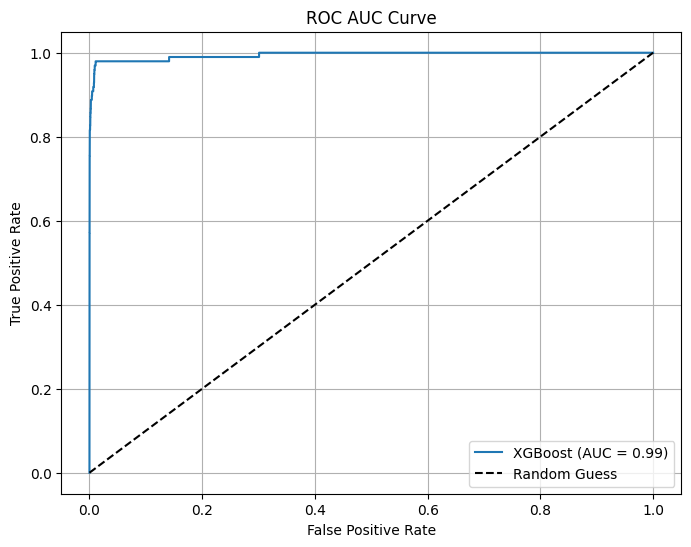

In [42]:
#Ploting ROC AUC curve for xgbooost
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities for the positive class
y_proba = xgb2.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.grid(True)
plt.show()


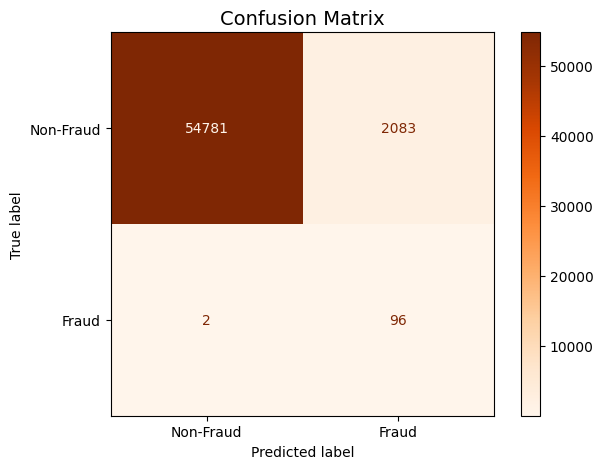

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

# Predict classes
y_pred = xgb2.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap='Oranges', values_format='d')  # Try 'Oranges', 'Blues', or 'Purples'
plt.title("Confusion Matrix", fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()




### Generating Synthetic Data 
We will gennerate synthetic dataset to emulate real world transaction data 

In [37]:

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate synthetic data
synthetic_data = pd.DataFrame({
    'Time': np.random.uniform(0, 1, size=n_samples),              # normalized time
    'Amount': np.random.exponential(scale=100, size=n_samples),   # skewed distribution
    'Class': np.random.choice([0, 1], size=n_samples, p=[0.9, 0.1])  # 10% fraud, 90% non-fraud
})

# Add synthetic PCA features V1 to V28
for i in range(1, 29):
    synthetic_data[f'V{i}'] = np.random.normal(0, 1, size=n_samples)

# Reorder columns
cols = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount', 'Class']
synthetic_data = synthetic_data[cols]

# Display head of synthetic data
synthetic_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.374540,0.045572,0.075805,-0.269407,-0.066080,-0.158008,0.408253,-1.004141,-1.448014,0.399223,...,-1.970104,-1.517874,-0.023552,0.555513,0.197292,0.562881,1.562889,-0.889241,3.193368,0
1,0.950714,-0.651600,-0.677162,0.717542,-1.211016,-0.426881,-1.702584,-0.767798,-2.198806,0.647196,...,0.892597,-0.357029,-0.174354,-0.918687,0.311309,-0.879814,-0.273993,0.955301,101.172955,0
2,0.731994,2.143944,0.975120,1.502357,-0.651836,-1.012104,1.029156,-0.034685,0.440014,-0.483186,...,-1.211172,0.890383,0.225308,-0.417367,1.699957,1.987061,-0.243384,0.876047,37.739671,0
3,0.598658,0.633919,-0.147057,0.074095,0.047399,-1.654857,0.472597,0.234215,-0.502054,1.573987,...,0.730764,0.575205,-0.369527,-0.295090,1.071543,-0.530971,-0.299838,1.472671,71.043718,0
4,0.156019,-2.025143,-0.825497,1.628616,-0.860413,0.823171,0.256030,1.550500,-1.021233,-1.225766,...,0.014273,0.500666,-0.131473,0.975817,0.190636,-0.335138,1.904137,-0.603981,238.126553,0


In [38]:
# Separate X and y from synthetic data
X_synth_test = synthetic_data.drop('Class', axis=1)
y_synth_test = synthetic_data['Class']


In [39]:
# Predict class labels
y_pred = xgb2.predict(X_synth_test)

# Predict probabilities (optional, for ROC/AUC or threshold tuning)
y_proba = xgb2.predict_proba(X_synth_test)[:, 1]


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_synth_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_synth_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_synth_test, y_proba))


Confusion Matrix:
[[80 10]
 [ 9  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        90
           1       0.09      0.10      0.10        10

    accuracy                           0.81       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.82      0.81      0.81       100


ROC AUC Score:
0.5622222222222222


The XGBoost model's performance on the unseen synthetic data reveals a significant drop in its ability to detect fraud. While the overall accuracy is 81%, this is largely due to correctly predicting the majority non-fraud class (class 0). The model correctly identified 80 out of 90 non-fraud cases but only 1 out of 10 fraud cases, resulting in a very low recall of 10% and precision of 9% for the fraud class. The macro and weighted averages also reflect this imbalance, with macro F1-score at just 0.49. The ROC AUC score of 0.56—barely above random chance—further indicates poor discrimination between fraud and non-fraud under this new synthetic distribution. This suggests that while the model generalizes well to real-world test data, it struggles with unfamiliar or artificially shifted patterns, highlighting a potential weakness in robustness to out-of-distribution inputs.